## Capstone Project: Austin Neighborhood Analysis of COVID-19


## Problem

As part of the IBM Data Science Professional Certification, there is a Capstone Project. For this project, I'd like to investigate if Foursquare's Places API can help gain insights about the COVID-19 pandemic in Austin, TX. Such information would be useful for immune compromised individuals who wish to go out in public.

## Background

Over the last six months, the world has been affected by the SARS-Cov-2 Coronavirus, also known as COVID-19. At the beginning of July, the total cases worldwide exceeded 11m, with around 6m recovered and over 500k deaths. Cases in the United States were dropping throughout May, but experienced a major spike during June. One of the many cities in the US that experienced such a spike is Austin, TX. Some theories presented in the local media are:

<ul><li>Texas economy opened up too early and too quickly
    <li>Celebrations over Memorial Day weekend of May 23rd
    <li>Mass protests starting the weekend of May 29th
</ul>

Texas allowed restaurants, retail outlets, malls and movie theaters to reopen on May 1st. A second phase of openings, including barbershops, hair salons, pools and gyms reopened on May 8th. Looking at Austin Public Health's "New Cases Reported per Day", there was an initial up-tick of news cases on June 8th with spiking around June 19th and peaking on June 27th. It is important to note, symptoms normally present in newly infected persons within 5-12 days after contact, and people in Austin are encouraged to get tested at symptom onset.

![Travis County - New Cases Per Day](TravisCounty_NewCasesPerDay.png)

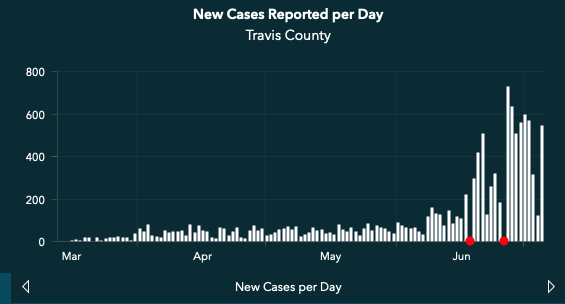

## Data Collection

For the above problem, the data desired that we will initially collect is as follows:

<ul><li>Austin COVID-19 confirmed cases by zip code
    <li>Locale geo JSON for choropleth maps
    <li>Foursquare venue information
</ul>

Most COVID-19 dashboards and published datasets, like from Johns Hopkins University, track at the country or state level. There are a few that track further down to the county levels, but there are very few published datasets with zip code/ neighborhood level data. Austin Public Health's <a href="https://austin.maps.arcgis.com/apps/opsdashboard/index.html#/39e4f8d4acb0433baae6d15a931fa984">COVID-19 Surveillance Dashboard</a> publishes the number of new confirmed cases by zip code. However this data is only viewable in a map widget, and it uses the most recently entered data. To get a better view of how neighborhoods have been affected by COVID-19, this data should ideally be over time. So a Pandas dataframe would include columns for zip code and multiple dates. At minimum the date columns should include confirmed case levels from before and after May 29th, as we want to see if there are patterns associated with the neighborhoods before and after Memorial Day weekend and the Black Lives Matter protests.

To present this data using a choropleth map, we will need a geo JSON file that includes Austin zip code boundaries. This way we will be able to present both COVID-19 cases and Foursquare venues of interest within the same map.

As to Foursquare, the intent is to retrieve the top venues by zip code. Based on this list. We want to analyze if there are types of venue and foot traffic/ check-ins differences. The foot traffic/ check-ins dimension might not be possible with the Foursquare "Personal" account tier. If so, we will need to look for other forms of data that can help, maybe traffic data from <a href="https://data.austintexas.gov">data.austintexas.gov</a>.

## Project Dimensions

The final deliverables of the project will include:

<ol><li>A link to your Notebook on your Github repository, showing your code. (15 marks)
    <li>A full report consisting of all of the following components (15 marks):
        <ul><li>Introduction where you discuss the business problem and who would be interested in this project.
            <li>Data where you describe the data that will be used to solve the problem and the source of the data.
            <li>Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
            <li>Results section where you discuss the results.
            <li>Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
            <li>Conclusion section where you conclude the report.
        </ul>
    <li>Your choice of a presentation or blogpost. (10 marks)
</ol>

## Data Wrangling

Unfortunately, I was unable to find zip code data over time from Austin Public Health (APH). I sent an email to APH, but did not receive a response. As a backup, I did manually collect the data from the <a href="https://www.statesman.com/news/20200523/which-austin-area-zip-codes-have-most-coronavirus-cases-and-why">Austin American Statesman</a> and Travis County. The data was able to obtain was from before Memorial Day Weekend, a couple of weeks after and from the end of June. This data is part of a CSV file I created and uploaded to my repository, named "COVID19_Cases_By_ZipCode.csv".

As the CSV is manually generated, my first set of steps is to read the data and conduct some basic visualization.

In [224]:
# Import Libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib as mpl
import matplotlib.pyplot as plt

print('pandas={}'.format(pd.__version__))
print('numpy={}'.format(np.__version__))
print('matplotlib={}'.format(mpl.__version__))

pandas=1.0.5
numpy=1.18.5
matplotlib=3.1.1


In [3]:
# Create Dataframe from CSV file

filename = "COVID19_Cases_By_ZipCode.csv"
df_aus = pd.read_csv(filename)

print(df_aus.head(10))
print(df_aus.tail(10))

   Zip Code  5/23/20  6/9/20  6/30/20
0     78701       39      49      121
1     78702       40      59      225
2     78703       43      46      108
3     78704      109     148      347
4     78705       62      68      161
5     78719        3       3       14
6     78721       38      61      125
7     78722        9       9       21
8     78723       71     120      271
9     78724      107     188      397
    Zip Code  5/23/20  6/9/20  6/30/20
30     78749       37      60      140
31     78750       18      26       86
32     78751       17      22       68
33     78752       91     149      301
34     78753      169     298      758
35     78754       43      91      255
36     78756        7      11       29
37     78757       34      42      135
38     78758      164     257      603
39     78759       22      36      109


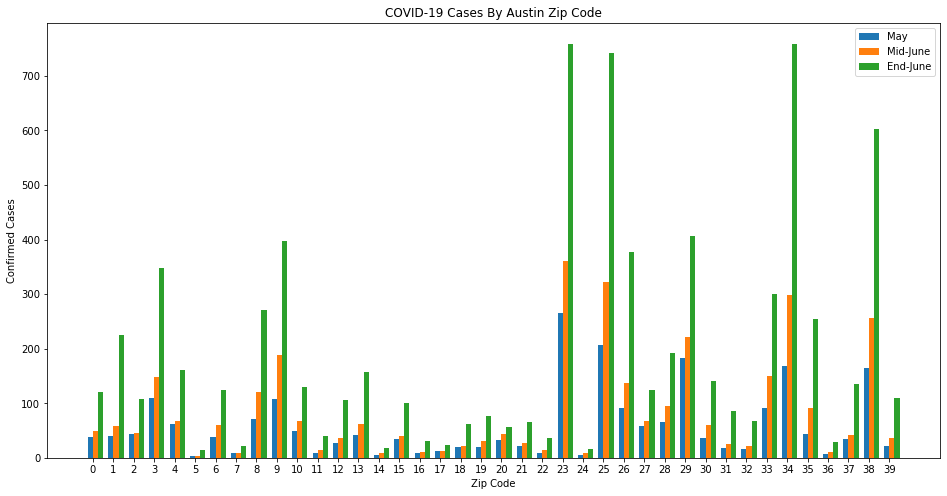

In [4]:
# Create Comparison Bar Chart

index = np.arange(40)
bar_width = 0.25

fig, ax = plt.subplots(figsize = (16,8))
bar1 = ax.bar(index, df_aus["5/23/20"].values, bar_width, label="May")
bar2 = ax.bar(index+bar_width, df_aus["6/9/20"].values, bar_width, label="Mid-June")
bar3 = ax.bar(index+bar_width+bar_width, df_aus["6/30/20"].values, bar_width, label="End-June")

ax.set_xlabel('Zip Code')
ax.set_ylabel('Confirmed Cases')
ax.set_title('COVID-19 Cases By Austin Zip Code')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_aus.index)
ax.legend()

plt.show()

## Initial Thoughts and Specialized Visualization

With a dataset containing 40 zip codes, visualizing them together in a bar chart is difficult to truly understand which zip codes stand out. So, the next step is to visualize using a smaller dataset. Below are the next set of tasks:

<ul><li>Reduce dataframe to ten zip codes with the largest confirmed cases and plot
    <li>Check if any zip codes fall out of top ten grouping 
    <li>Produce choropleth map highlighting most recent case differences by zip code
</ul>

In [5]:
# Create top ten dataframes for each Peroid

df_top_may = df_aus.sort_values('5/23/20', ascending=False).head(10)
df_top_jun = df_aus.sort_values('6/9/20', ascending=False).head(10)
df_top_jul = df_aus.sort_values('6/30/20', ascending=False).head(10)

# Assemble dataframe of top ten zip code order by period
data_dist = {'5/23/20': df_top_may['Zip Code'].values,
           '6/9/20' : df_top_jun['Zip Code'].values,
           '6/30/20': df_top_jul['Zip Code'].values}

df_dist = pd.DataFrame(data_dist)

df_dist

5/23/20  6/9/20  6/30/20
0    78741   78741    78741
1    78744   78744    78753
2    78748   78753    78744
3    78753   78758    78758
4    78758   78748    78748
5    78704   78724    78724
6    78724   78752    78745
7    78745   78704    78704
8    78752   78745    78752
9    78723   78723    78723

In [6]:
# Reset order by Zip Code for comparing
df_top_may = df_top_may.sort_values('Zip Code', ascending=True)
df_top_jun = df_top_jun.sort_values('Zip Code', ascending=True)
df_top_jul = df_top_jul.sort_values('Zip Code', ascending=True)

# Check if top ten Zip Codes are in all periods
np.where((df_top_may['Zip Code'].values == df_top_jun['Zip Code'].values) & 
         (df_top_jun['Zip Code'].values == df_top_jul['Zip Code'].values), 'True', 'False')

array(['True', 'True', 'True', 'True', 'True', 'True', 'True', 'True',
       'True', 'True'], dtype='<U5')

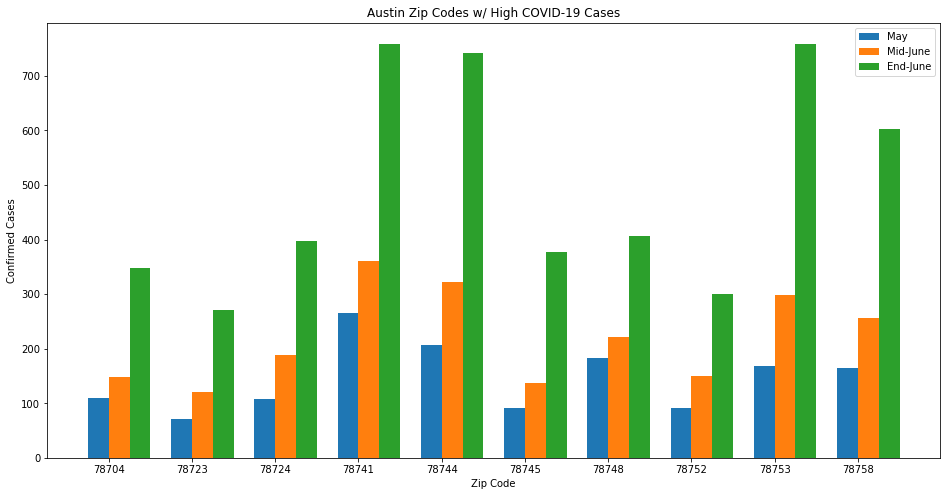

In [7]:
# Create Comparison Bar Chart

index = np.arange(10)
bar_width = 0.25

fig, ax = plt.subplots(figsize = (16,8))
bar1 = ax.bar(index, df_top_jul["5/23/20"].values, bar_width, label="May")
bar2 = ax.bar(index+bar_width, df_top_jul["6/9/20"].values, bar_width, label="Mid-June")
bar3 = ax.bar(index+bar_width+bar_width, df_top_jul["6/30/20"].values, bar_width, label="End-June")

ax.set_xlabel('Zip Code')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Austin Zip Codes w/ High COVID-19 Cases')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_top_jul['Zip Code'])
ax.legend()

plt.show()

In [219]:
# Load Libraries for Choropleth Mapping for Cases by Zip Code

!pip install folium==0.11.0

import folium
from folium import plugins
import json

print('Folium and JSON imported')

Folium and JSON imported


In [220]:
# Read GeoJSON File
aus_geo = json.load(open('austin_area_zip_codes.geojson'))

In [221]:
# Generate Choropleth Map

# Read GeoJSON File
#aus_geo = r'austin_area_zip_codes.geojson'

# Convert Zip Code column to string
df_aus[['Zip Code']] = df_aus[['Zip Code']].astype(str)

# Setup Map
may_map = folium.Map([30.26759, -97.74299], zoom_start=11, width=500, height=500)

choropleth = folium.Choropleth(
    geo_data = aus_geo,
    fill_opacity = 0.8,
    line_opacity = 0.2,
    data = df_aus,
    columns = ['Zip Code', '5/23/20'],
    key_on = 'feature.properties.zipcode',
    fill_color = 'BuGn',
    nan_fill_color = 'GnBu',
    nan_fill_opacity = 0.1,
    legend_name = 'Confirmed COVID-19 Cases by Zip Code, 5/23/2020',
    highlight = True
).add_to(may_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields = ['zipcode', 'name'], 
        labels = False)
).add_to(may_map)

folium.LayerControl(collapsed=True).add_to(may_map)

# Display Map
may_map

In [222]:
# Generate Choropleth Map

# Read GeoJSON File
#aus_geo = r'austin_area_zip_codes.geojson'

# Convert Zip Code column to string
df_aus[['Zip Code']] = df_aus[['Zip Code']].astype(str)

# Setup Map
jun_map = folium.Map([30.26759, -97.74299], zoom_start=11, width=500, height=500)

choropleth = folium.Choropleth(
    geo_data = aus_geo,
    fill_opacity = 0.8,
    line_opacity = 0.2,
    data = df_aus,
    columns = ['Zip Code', '6/9/20'],
    key_on = 'feature.properties.zipcode',
    fill_color = 'PuBu',
    nan_fill_color = 'GnBu',
    nan_fill_opacity = 0.1,
    legend_name = 'Confirmed COVID-19 Cases by Zip Code, 6/9/2020',
    highlight = True
).add_to(jun_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields = ['zipcode', 'name'], 
        labels = False)
).add_to(jun_map)

folium.LayerControl(collapsed=True).add_to(jun_map)

# Display Map
jun_map

In [223]:
# Generate Choropleth Map

# Read GeoJSON File
#aus_geo = r'austin_area_zip_codes.geojson'

# Convert Zip Code column to string
df_aus[['Zip Code']] = df_aus[['Zip Code']].astype(str)

# Setup Map
jul_map = folium.Map([30.26759, -97.74299], zoom_start=11, width=500, height=500)

choropleth = folium.Choropleth(
    geo_data = aus_geo,
    fill_opacity = 0.8,
    line_opacity = 0.2,
    data = df_aus,
    columns = ['Zip Code', '6/30/20'],
    key_on = 'feature.properties.zipcode',
    fill_color = 'PuRd',
    nan_fill_color = 'GnBu',
    nan_fill_opacity = 0.1,
    legend_name = 'Confirmed COVID-19 Cases by Zip Code, 6/30/2020',
    highlight = True
).add_to(jul_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields = ['zipcode', 'name'], 
        labels = False)
).add_to(jul_map)

folium.LayerControl(collapsed=True).add_to(jul_map)

# Display Map
jul_map

## Initial Observations

By reducing the dataset to the top ten zip codes with highest number of confirmed cases of COVID-19, we can now better understand the areas in Austin most affected by the Coronavirus pandemic. Some observations to note are:

<ul><li>None of the ten zip codes dropped out of the dataset from May to July
    <li>There were a few zip codes that changed position
    <li>The most significant was 78748, which was number three in May and in the middle by July
    <li>The riverside neighborhood, 78741, has continually been at the top of each period
    <li>Four zip codes in July stood out with very high numbers (78741, 78744, 78753, 78758)
    <li>Prior to mid-June, all zip codes were below 400 confirmed cases
    <li>Zip codes in the top ten are primarily in East, North, South and South East Austin
</ul>

## Continued Analysis

Further inquiry around why these specific areas are seeing higher growth in confirmed cases is needed. We will look at Foursquare and other city data to see if such a correlation can be gained.

In [8]:
# Import additional Libraries for working with Foursquare and JSON

# Already imported
# import numpy as np # library to handle data in a vectorized manner
# import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.11.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [9]:
# Define Foursquare Credentials and Version

CLIENT_ID		= 'Q1AGVL5RU0KXLICCN2WIHH1XMIYQMRZ5C4MCLVJDVOZ10KM0'
CLIENT_SECRET	= 'V1MDLADJJOYTPSOD2KQJBENMD4BGITFH0GZTNPHW3KL1JU5S'
VERSION = '20200630' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)
print('VERSION: ' + VERSION)

Your credentails:
CLIENT_ID: Q1AGVL5RU0KXLICCN2WIHH1XMIYQMRZ5C4MCLVJDVOZ10KM0
CLIENT_SECRET: V1MDLADJJOYTPSOD2KQJBENMD4BGITFH0GZTNPHW3KL1JU5S
VERSION: 20200630


In [10]:
# Function to create url and retrieve Foursquare data
def get_zipcode_venues(zipcode):
    LIMIT  = 100 # limit of number of venues returned by Foursquare API
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        zipcode, 
        LIMIT)
    results = requests.get(url).json()
    print('Retrieved data for: ' + zipcode)
    return results

# Retrieve Foursquare Data for Top 5 Zipcodes
aus_json_1 = get_zipcode_venues(str(df_dist.iloc[0,2]))
aus_json_2 = get_zipcode_venues(str(df_dist.iloc[1,2]))
aus_json_3 = get_zipcode_venues(str(df_dist.iloc[2,2]))
aus_json_4 = get_zipcode_venues(str(df_dist.iloc[3,2]))
aus_json_5 = get_zipcode_venues(str(df_dist.iloc[4,2]))

# print(aus_json_1) 

Retrieved data for: 78741
Retrieved data for: 78753
Retrieved data for: 78744
Retrieved data for: 78758
Retrieved data for: 78748


In [11]:
# Function to extract the category of venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Function to convert JSON into a clean dataframe
def clean_venue_json(venue_json):
    venues = venue_json['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues) # flatten JSON
    
    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]
    
    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    
    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    nearby_venues.head(20)
    
    return nearby_venues

In [12]:
# Determine unique categories for each top zip code

aus_df_1 = clean_venue_json(aus_json_1)
aus_df_2 = clean_venue_json(aus_json_2)
aus_df_3 = clean_venue_json(aus_json_3)
aus_df_4 = clean_venue_json(aus_json_4)
aus_df_5 = clean_venue_json(aus_json_5)

df_comparison = df_dist[['6/30/20']].head(5)
df_comparison.insert(1, "Unique Categories", [len(aus_df_1['categories'].unique()), len(aus_df_2['categories'].unique()), len(aus_df_3['categories'].unique()), len(aus_df_4['categories'].unique()), len(aus_df_5['categories'].unique())], True)
df_comparison.insert(2, "Rows Returned", [len(aus_df_1.index), len(aus_df_2.index), len(aus_df_3.index), len(aus_df_4.index), len(aus_df_5.index)], True)

df_comparison

6/30/20  Unique Categories  Rows Returned
0    78741                 49            100
1    78753                 54            100
2    78744                 58            100
3    78758                 65            100
4    78748                 61            100

In [13]:
# Create bottom ten dataframes for each Peroid

df_bottom_may = df_aus.sort_values('5/23/20', ascending=True).head(10)
df_bottom_jun = df_aus.sort_values('6/9/20', ascending=True).head(10)
df_bottom_jul = df_aus.sort_values('6/30/20', ascending=True).head(10)

# Assemble dataframe of top ten zip code order by period
data_bottom_dist = {'5/23/20': df_bottom_may['Zip Code'].values,
           '6/9/20' : df_bottom_jun['Zip Code'].values,
           '6/30/20': df_bottom_jul['Zip Code'].values}

df_bottom_dist = pd.DataFrame(data_bottom_dist)

df_bottom_dist

5/23/20  6/9/20  6/30/20
0    78719   78719    78719
1    78742   78742    78742
2    78730   78730    78730
3    78756   78722    78722
4    78739   78732    78733
5    78722   78756    78756
6    78726   78733    78732
7    78732   78739    78739
8    78733   78726    78726
9    78751   78751    78736

In [14]:
df_bottom_jul.head(10)

Zip Code  5/23/20  6/9/20  6/30/20
5      78719        3       3       14
24     78742        5       8       17
14     78730        5       8       18
7      78722        9       9       21
17     78733       12      13       23
36     78756        7      11       29
16     78732        9      10       30
22     78739        9      14       36
11     78726        9      14       40
20     78736       33      43       56

In [15]:
# Retrieve Foursquare Data for Bottom 5 Zipcodes
bottom_json_1 = get_zipcode_venues(str(df_bottom_dist.iloc[0,2]))
bottom_json_2 = get_zipcode_venues(str(df_bottom_dist.iloc[1,2]))
bottom_json_3 = get_zipcode_venues(str(df_bottom_dist.iloc[2,2]))
bottom_json_4 = get_zipcode_venues(str(df_bottom_dist.iloc[3,2]))
bottom_json_5 = get_zipcode_venues(str(df_bottom_dist.iloc[4,2]))

# print(aus_json_1) 

Retrieved data for: 78719
Retrieved data for: 78742
Retrieved data for: 78730
Retrieved data for: 78722
Retrieved data for: 78733


In [33]:
# Determine unique categories count for each bottom zip code

bottom_df_1 = clean_venue_json(bottom_json_1)
bottom_df_2 = clean_venue_json(bottom_json_2)
bottom_df_3 = clean_venue_json(bottom_json_3)
bottom_df_4 = clean_venue_json(bottom_json_4)
bottom_df_5 = clean_venue_json(bottom_json_5)

# Add Bottom Unique Characteristics to Comparison Dataframe

df_bottom_comparison = df_bottom_dist[['6/30/20']].head(5)
df_bottom_comparison.insert(1, "Unique Categories", [len(bottom_df_1['categories'].unique()), len(bottom_df_2['categories'].unique()), len(bottom_df_3['categories'].unique()), len(bottom_df_4['categories'].unique()), len(bottom_df_5['categories'].unique())], True)
df_bottom_comparison.insert(2, "Rows Returned", [len(bottom_df_1.index), len(bottom_df_2.index), len(bottom_df_3.index), len(bottom_df_4.index), len(bottom_df_5.index)], True)

df_bottom_comparison

6/30/20  Unique Categories  Rows Returned
0    78719                 42             79
1    78742                 15             20
2    78730                 55             89
3    78722                 59            100
4    78733                 26             37

In [30]:
# Combine Top and Bottom Comparison Dataframes for Plotting

df_result = pd.concat([df_comparison, df_bottom_comparison])
                     
df_result.reset_index(inplace = True)
df_result.drop(['index'], axis=1, inplace=True)

df_result

6/30/20  Unique Categories  Rows Returned
0    78741                 49            100
1    78753                 54            100
2    78744                 58            100
3    78758                 65            100
4    78748                 61            100
5    78719                 42             79
6    78742                 15             20
7    78730                 55             89
8    78722                 59            100
9    78733                 26             37

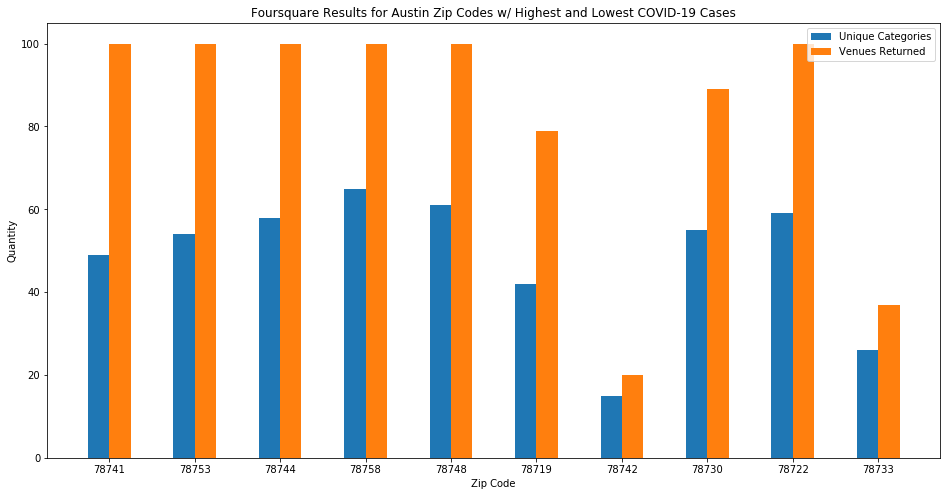

In [32]:
# Create a bar chart with unique categories and rows returned data for top and bottom zip codes

index = np.arange(10)
bar_width = 0.25

fig, ax = plt.subplots(figsize = (16,8))
bar1 = ax.bar(index, df_result["Unique Categories"].values, bar_width, label="Unique Categories")
bar2 = ax.bar(index+bar_width, df_result["Rows Returned"].values, bar_width, label="Venues Returned")

ax.set_xlabel('Zip Code')
ax.set_ylabel('Quantity')
ax.set_title('Foursquare Results for Austin Zip Codes w/ Highest and Lowest COVID-19 Cases')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_result['6/30/20'])
ax.legend()

plt.show()

## Foursquare Observations

When we pulled in Foursquare venue information by zip code for the top five zip codes (78741, 78753, 78744, 78758 and 78748), the data shape was very similar for all of them. All returned the query limit of 100 items. Four out of the five had over 50 unique categories. Only 78741, which is the venue that has had the highest number of confirmed COVID-19 cases, had less than 50. It is unclear whether there is a correlation between lower unique categories (less venue diversity) and higher COVID-19 cases.

We did the same with the bottom five zip codes using similar Foursquare queries. The bottom five zip codes identified were 78719, 78742, 78730, 78722 and 78733. What was strikingly different is four out of the five bottom zip codes returned less than query limit, two came back with less than 30 venues. Of the other three, their unique categories returned were 42, 55 and 59.

Based on the above, it seems zip codes with a large number of venues tend to have a propensity for having higher occurrences of COVID-19. This makes sense as there are more places for people to go and be exposed to the virus. There are exceptions to this correlation, such as 78722 which is near University of Texas campus on the east side of IH-35.

## Continued Analysis

As I was unable to dive deeper using Foursquare for venue foot traffic analysis to discern any trending changes associated with re-opening, Memorial Weekend and the protests, I decided to look at other data available from the City of Austin. I found a CSV file downloadable and last updated on 08-JUL-2020 from data.austin.gov website on '<a href="https://catalog.data.gov/dataset/austin-code-covid-19-complaint-cases">Austin Code COVID-19 Complaint Cases</a>'. This file includes information like:

<ul><li>Type of Business (Restuarant, Parks, Residential...)
    <li>Type of Complaint (Face-Covering, Social Distancing...)
    <li>Opened Date
    <li>Zip Code and other Location Information
</ul>

So maybe complaints data might be a broad stroke substitute for venue foot traffic analysis.

In [201]:
# Create Dataframe from Complaints CSV file

filename = "Austin_Code_COVID-19_Complaint_Cases.csv"
df_complaints = pd.read_csv(filename)

# Drop NaN values and Unused Columns
df_complaints.dropna()
df_complaints.drop(['CASENUMBER', 'CASECLASSIFICATION', 'CONSTRUCTIONREFERRAL', 'CITATIONISSUED', 
                    'CLOSEDATE', 'OUTCOME', 'COUNCILDISTRICT', 'Single Member Council Districts', 
                    'Boundaries: Zip Code Tabulation Areas, 2017', 'BOUNDARIES_single_member_districts',
                    'Neighborhood Planning Areas', 'Community Registry'], axis=1, inplace=True)

# Change Zip Code to 5 digit Austin equivalent
df_complaints['Zip Code'] = df_complaints['Zipcodes'].apply(lambda x : x + 78700)
df_complaints.drop(['Zipcodes'], axis=1, inplace=True)

df_complaints.head(5)

TYPEOFBUSINESS    TYPEOFCOMPLAINT      OPENDATE  \
0          Other      Face-Covering  6/27/20 0:00   
1          Other      Face-Covering  6/30/20 0:00   
2          Other  Social Distancing  6/10/20 0:00   
3          Other  Social Distancing  6/10/20 0:00   
4          Other      Face-Covering  6/28/20 0:00   

                                           COMPLAINT  \
0                        COVID 19Face MasksKings Gas   
1               Face Covering Non-Compliancecovid 19   
2  covid19Report Social Distancing/Over Occupancy...   
3                   COVID 19, Social Distancing, PPE   
4                      COVID-19Face CoveringPlanet K   

                       ADDRESS                          LOCATION  Zip Code  
0            2907 S 1ST STREET  POINT (-97.76323469 30.23606805)   78775.0  
1           6920 MENCHACA ROAD  POINT (-97.80824885 30.20246739)   78723.0  
2  1000 E 41ST STREET BUNIT  1   POINT (-97.7196515 30.30046327)   78765.0  
3        601 RIO GRANDE STREET  POINT (-97.74926907 30.27008948)   78724.0  
4       1516 S LAMAR BOULEVARD  POINT (-97.76512606 30.25182152)   78775.0

In [202]:
# Convert Zip Code to String
df_complaints[['Zip Code']] = df_complaints[['Zip Code']].astype(str)
df_complaints['Zip Code'] = df_complaints['Zip Code'].map(lambda x: x.rstrip('.0'))

# Rename Columns
df_complaints = df_complaints.rename(columns = {'TYPEOFBUSINESS':'Busines', 'TYPEOFCOMPLAINT':'Type', 'OPENDATE':'Date',
                                                'COMPLAINT':'Complaint', 'ADDRESS':'Address', 'LOCATION':'Location', 
                                                'Zip Code': 'ZipCode'})

df_complaints.head(5)

Busines               Type          Date  \
0   Other      Face-Covering  6/27/20 0:00   
1   Other      Face-Covering  6/30/20 0:00   
2   Other  Social Distancing  6/10/20 0:00   
3   Other  Social Distancing  6/10/20 0:00   
4   Other      Face-Covering  6/28/20 0:00   

                                           Complaint  \
0                        COVID 19Face MasksKings Gas   
1               Face Covering Non-Compliancecovid 19   
2  covid19Report Social Distancing/Over Occupancy...   
3                   COVID 19, Social Distancing, PPE   
4                      COVID-19Face CoveringPlanet K   

                       Address                          Location ZipCode  
0            2907 S 1ST STREET  POINT (-97.76323469 30.23606805)   78775  
1           6920 MENCHACA ROAD  POINT (-97.80824885 30.20246739)   78723  
2  1000 E 41ST STREET BUNIT  1   POINT (-97.7196515 30.30046327)   78765  
3        601 RIO GRANDE STREET  POINT (-97.74926907 30.27008948)   78724  
4       1516 S LAMAR BOULEVARD  POINT (-97.76512606 30.25182152)   78775

In [203]:
# Create a Week Column Based on Date Timestamp

df_complaints['Date'] = pd.to_datetime(df_complaints['Date'], infer_datetime_format=True)
df_complaints['Week'] = df_complaints['Date'].apply(lambda x: "%d" % (x.week))

df_complaints.head(10)

Busines               Type       Date  \
0   Other      Face-Covering 2020-06-27   
1   Other      Face-Covering 2020-06-30   
2   Other  Social Distancing 2020-06-10   
3   Other  Social Distancing 2020-06-10   
4   Other      Face-Covering 2020-06-28   
5   Other      Face-Covering 2020-06-27   
6   Other      Face-Covering 2020-06-27   
7   Parks  Social Distancing 2020-05-11   
8   Parks  Social Distancing 2020-05-11   
9   Parks  Social Distancing 2020-05-11   

                                           Complaint  \
0                        COVID 19Face MasksKings Gas   
1               Face Covering Non-Compliancecovid 19   
2  covid19Report Social Distancing/Over Occupancy...   
3                   COVID 19, Social Distancing, PPE   
4                      COVID-19Face CoveringPlanet K   
5                             COVID 19Face Masks7/11   
6                               COVID19Face MaskAudi   
7            COVID19SOCIAL DISTANCINGBULL CREEK ROAD   
8              COVID19SOCIAL DISTANCINGEMA LONG PARK   
9               COVID19SOCIAL DISTANCINGMUELLER PARK   

                       Address                          Location ZipCode Week  
0            2907 S 1ST STREET  POINT (-97.76323469 30.23606805)   78775   26  
1           6920 MENCHACA ROAD  POINT (-97.80824885 30.20246739)   78723   27  
2  1000 E 41ST STREET BUNIT  1   POINT (-97.7196515 30.30046327)   78765   24  
3        601 RIO GRANDE STREET  POINT (-97.74926907 30.27008948)   78724   24  
4       1516 S LAMAR BOULEVARD  POINT (-97.76512606 30.25182152)   78775   26  
5  1901 E WILLIAM CANNON DRIVE  POINT (-97.76570663 30.18802387)    7872   26  
6      12971 POND SPRINGS ROAD  POINT (-97.77200641 30.44029381)   78746   26  
7          6701 LAKEWOOD DRIVE  POINT (-97.78724986 30.36591575)   78766   20  
8          1600 CITY PARK ROAD  POINT (-97.83963324 30.32737861)   78706   20  
9       4550 MUELLER BOULEVARD   POINT (-97.7073445 30.29720719)   78733   20

In [204]:
# Breakdown of Case Types by Week Grouping

print(df_complaints.groupby('Week').Type.value_counts())

Week  Type                                   
12    Over Occupancy                             151
      Social Distancing                           36
      Other                                        2
13    Social Distancing                          354
      Over Occupancy                             146
      Non-essential Business                      15
      Other                                        8
      Face-Covering                                1
14    Social Distancing                          404
      Over Occupancy                             152
      Non-essential Business                      23
      Face-Covering                                2
      Other                                        2
15    Social Distancing                          525
      Over Occupancy                             112
      Non-essential Business                      36
      Other                                       11
      Face-Covering                                1


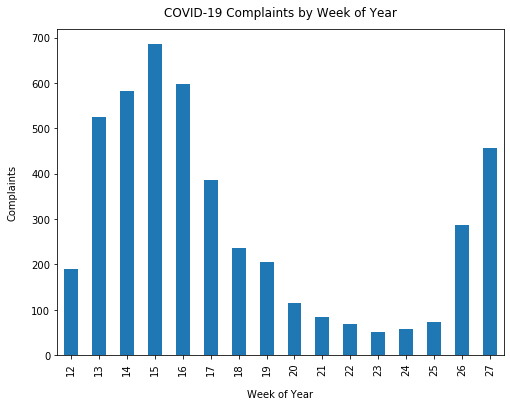

In [216]:
# Chart the Cumulative Complaints by Week

order = list(range(12, 28))
order = list(map(str,order))

df_complaints['Week'].value_counts().loc[order].plot(kind='bar', figsize=(8, 6))
plt.xlabel("Week of Year", labelpad=14)
plt.ylabel("Complaints", labelpad=14)
plt.title("COVID-19 Complaints by Week of Year", y=1.02);

In [205]:
# Reduce dataframe to top and bottom zip codes

zipcodes = df_result['6/30/20'].values.tolist()
zipcodes = list(map(str,zipcodes))
df_complaints_reduced = df_complaints.loc[df_complaints['ZipCode'].isin(zipcodes)]

df_complaints_reduced.head(5)

Busines               Type       Date  \
9    Parks  Social Distancing 2020-05-11   
13   Other  Social Distancing 2020-05-11   
15   Other      Face-Covering 2020-05-11   
21   Other     Over Occupancy 2020-05-11   
33   Other     Over Occupancy 2020-04-04   

                                          Complaint  \
9              COVID19SOCIAL DISTANCINGMUELLER PARK   
13  COVID-19 .. social distancing at Far Out Lounge   
15      COVID19EMPLOYEES NOT WEARING MASKSHORT STOP   
21                                SR #: 20-00185293   
33                          COVID-19 Over Occupancy   

                        Address                          Location ZipCode Week  
9        4550 MUELLER BOULEVARD   POINT (-97.7073445 30.29720719)   78733   20  
13       8504 S CONGRESS AVENUE  POINT (-97.78580164 30.17273225)   78722   20  
15           6603 BERKMAN DRIVE  POINT (-97.68898814 30.31913981)   78733   20  
21  10401 RESEARCH BLVD SVRD NB  POINT (-97.74388078 30.39660736)   78758   20  
33            9111 S 1ST STREET  POINT (-97.80018676 30.17145785)   78722   14

In [206]:
print(df_complaints_reduced.groupby('Week').ZipCode.value_counts())

Week  ZipCode
12    78722      11
      78733      10
      78758       5
      78753       3
      78748       2
13    78733      21
      78722      14
      78758      12
      78753       5
      78748       4
14    78733      33
      78722      10
      78758       9
      78748       7
      78753       5
15    78733      31
      78722      20
      78758      17
      78753      12
      78748       2
16    78733      32
      78722      14
      78758      14
      78753      11
      78748       5
17    78733      21
      78722      14
      78753       6
      78758       3
      78748       2
18    78733      13
      78722       8
      78753       7
      78758       5
19    78733      12
      78753       5
      78722       3
      78758       3
20    78722       9
      78733       7
      78758       3
      78753       2
      78748       1
21    78722       3
      78733       2
22    78733       4
      78722       1
      78758       1
23    78722       3
      

In [207]:
print(df_complaints_reduced.groupby('Week').Type.value_counts())

Week  Type                                   
12    Over Occupancy                             27
      Social Distancing                           4
13    Social Distancing                          39
      Over Occupancy                             15
      Non-essential Business                      2
14    Social Distancing                          41
      Over Occupancy                             21
      Face-Covering                               1
      Non-essential Business                      1
15    Social Distancing                          59
      Over Occupancy                             17
      Non-essential Business                      5
      Other                                       1
16    Social Distancing                          59
      Face-Covering                               9
      Over Occupancy                              5
      Non-essential Business                      2
      Other                                       1
17    Social Dista

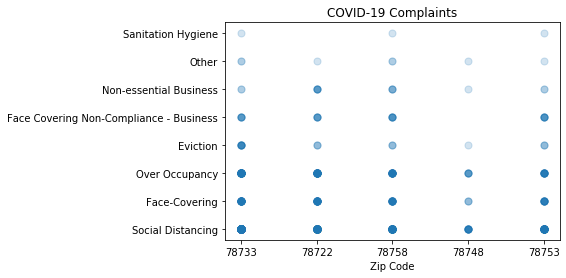

In [225]:
## Create Scatter Plot to show Complaint Type by Zip Code

# Create Chart
import matplotlib as mpl
import matplotlib.pyplot as plt

# NOTE: Need to include column names for x and y axis for plotting
df_complaints_reduced.plot(
	kind = 'scatter',
	x = 'ZipCode',
	y = 'Type',
	alpha = 0.2,
	s = 50)


plt.title('COVID-19 Complaints')
plt.xlabel('Zip Code')
plt.ylabel('')
plt.show()